<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3160---Image-Processing-and-Machine-Vision/blob/main/Point_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intensity Transformers

### Identity Transformations

s=T(r)=r

Every pixel keeps the same value, so the output image is exactly the same as the input.

#### Purpose
Often used as a reference or baseline when testing or comparing other transformations.

It’s like a “pass-through” filter — the identity transformation is useful for:

Debugging (check if your code is changing pixels when it shouldn’t)

Serving as a placeholder in code pipelines

Comparing histograms before/after enhancement

In [1]:
from google.colab import files
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

Saving cat.jpg to cat.jpg


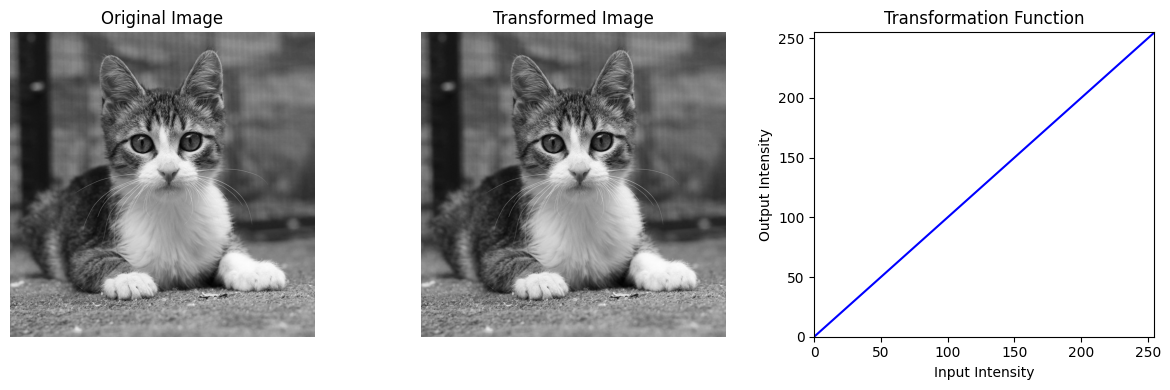

In [2]:
# Read image in grayscale
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Identity transformation lookup table
t = np.arange(256, dtype=np.uint8)  # s = r

# Apply transformation
g = t[f]

# Plot original, transformed, and transformation function
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

# Transformation function
ax[2].plot(t, t, color='blue')
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Transformation Function')

plt.tight_layout()
plt.show()


### Negative Transformation
Explanation
Inverts brightness: dark areas become light, and light areas become dark.

Useful for highlighting details in dark regions.

Formula
𝑠
=
𝑇
(
𝑟
)
=
(
𝐿
−
1
)
−
𝑟


where
𝐿
=
256 for 8-bit images.

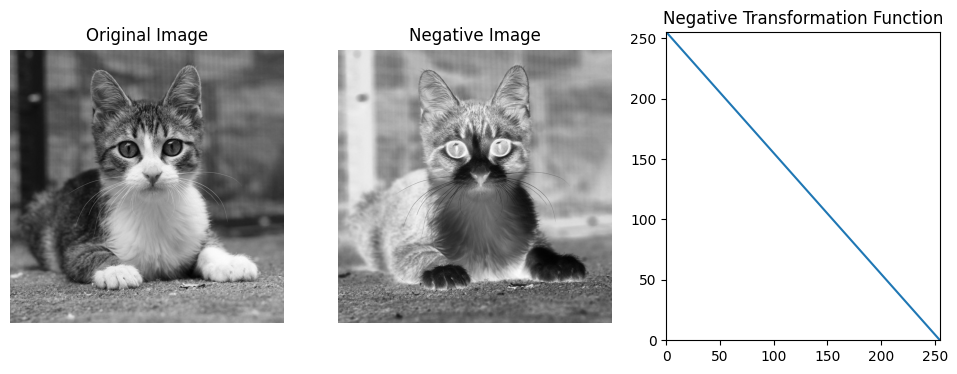

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Negative transformation table
L = 256
t = L - 1 - np.arange(256, dtype=np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Negative Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title('Negative Transformation Function')

plt.show()


### What is cv.LUT() in OpenCV?
LUT stands for Look-Up Table.
It is a method to transform pixel values in an image by precomputing a mapping for all possible input intensities (0–255) and then applying that mapping directly.

Instead of recalculating the transformation for each pixel, you:

Create a table t where t[i] is the output value for input intensity i.

Pass the image and the table to cv.LUT() → OpenCV looks up each pixel’s new value from the table.

Why use LUT?
Speed: No repeated computation per pixel. The transformation is a single table lookup for each pixel.

Simplicity: Any point-wise transformation (negative, log, gamma, threshold, etc.) can be applied just by modifying the table.

Consistency: The same transformation can be applied to many images easily.

Saving cat.jpg to cat (1).jpg
NumPy indexing time: 0.001832 seconds
cv.LUT() time: 0.000732 seconds


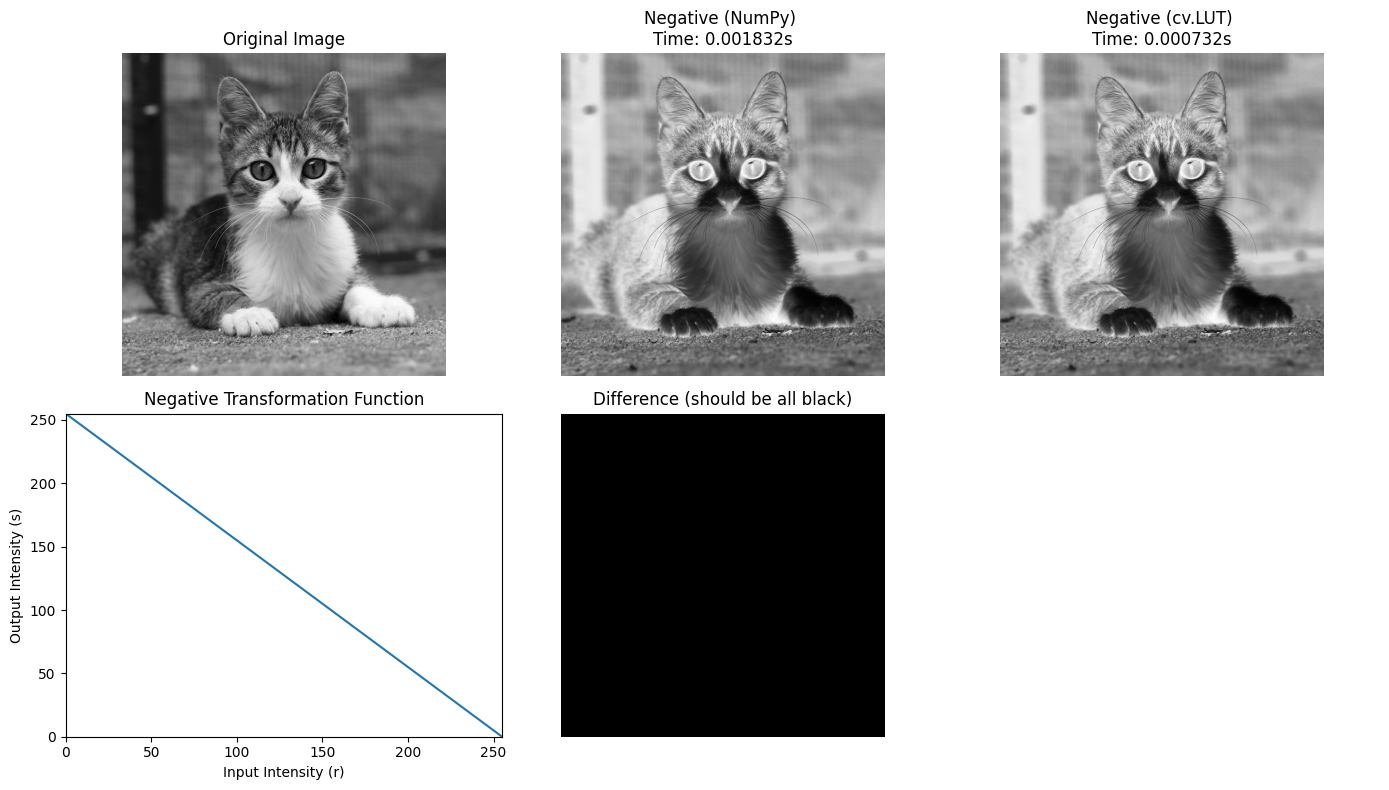

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files

# ==== Upload Image ====
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image in grayscale
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# ==== Negative Transformation Table ====
L = 256
t = L - 1 - np.arange(256, dtype=np.uint8)

# ==== Method 1: NumPy Indexing ====
start_time = time.time()
g_numpy = t[f]
numpy_time = time.time() - start_time

# ==== Method 2: OpenCV LUT ====
start_time = time.time()
g_lut = cv.LUT(f, t)
lut_time = time.time() - start_time

# ==== Results ====
print(f"NumPy indexing time: {numpy_time:.6f} seconds")
print(f"cv.LUT() time: {lut_time:.6f} seconds")

# ==== Plot Images ====
fig, ax = plt.subplots(2, 3, figsize=(14, 8))

# Original
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

# NumPy Negative
ax[0, 1].imshow(g_numpy, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title(f"Negative (NumPy) \nTime: {numpy_time:.6f}s")
ax[0, 1].axis('off')

# LUT Negative
ax[0, 2].imshow(g_lut, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title(f"Negative (cv.LUT) \nTime: {lut_time:.6f}s")
ax[0, 2].axis('off')

# Transformation function
ax[1, 0].plot(t)
ax[1, 0].set_xlim([0, 255])
ax[1, 0].set_ylim([0, 255])
ax[1, 0].set_title('Negative Transformation Function')
ax[1, 0].set_xlabel('Input Intensity (r)')
ax[1, 0].set_ylabel('Output Intensity (s)')

# Difference between methods
diff = cv.absdiff(g_numpy, g_lut)
ax[1, 1].imshow(diff, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title("Difference (should be all black)")
ax[1, 1].axis('off')

# Empty axis for spacing
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


### Log Transformation
Explanation
Expands dark pixel values and compresses bright pixel values.

Useful for enhancing details in dark regions.

Formula
𝑠
=
𝑇
(
𝑟
)
=
𝑐
⋅
log
⁡
(
1
+
𝑟
)
where:

𝑐
=
255
log
⁡
(
1
+
255
)
​


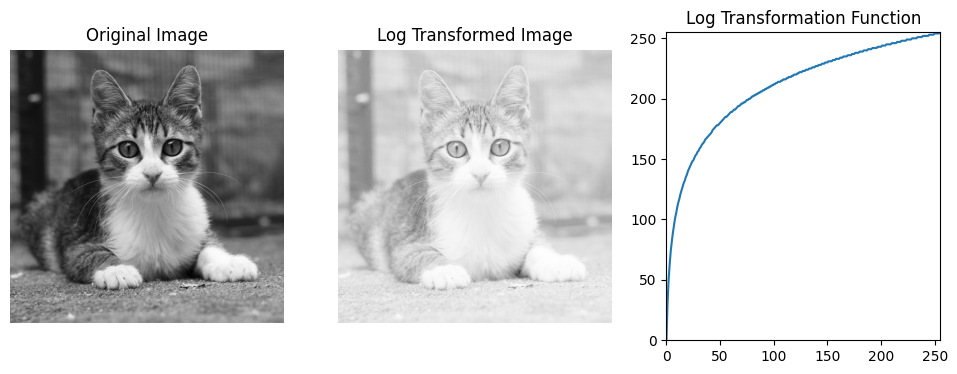

In [4]:
# Log transformation
c = 255 / np.log(1 + 255)
t = (c * np.log(1 + np.arange(256))).astype(np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Log Transformed Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title('Log Transformation Function')

plt.show()


### Gamma Transformation (Power-law)
Explanation
Adjusts brightness non-linearly:

𝛾
<
1
γ<1 → brightens image

𝛾
>
1
γ>1 → darkens image

Useful for gamma correction in display systems.

Formula
𝑠
=
𝑇
(
𝑟
)
=
𝑐
⋅
𝑟
𝛾

where:

𝑐
=
255
255
𝛾
​



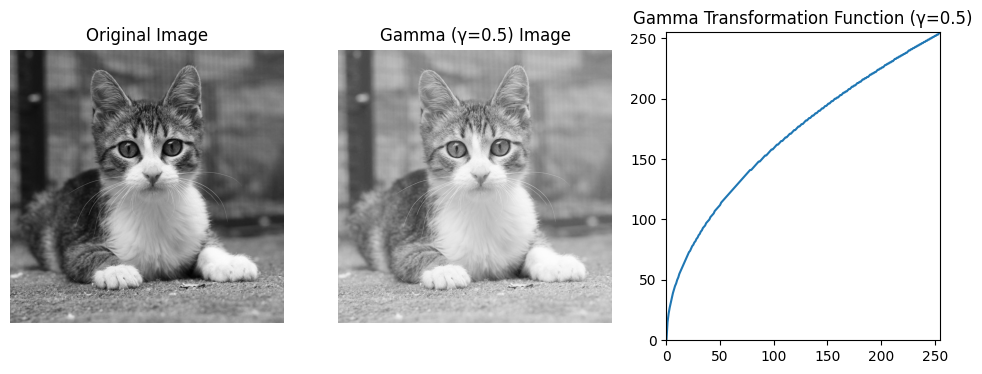

In [5]:
# Gamma transformation
gamma_val = 0.5  # try 0.5, 1.5, 2.0
c = 255 / (255 ** gamma_val)
t = (c * (np.arange(256) ** gamma_val)).astype(np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Gamma (γ={gamma_val}) Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title(f'Gamma Transformation Function (γ={gamma_val})')

plt.show()


###  What is Intensity Windowing?
It’s a pixel-level transformation where you remap input intensity values to new output values according to a curve (or function).

Think of it like this:

Dark areas → slightly brighter.

Mid-tones → strongly stretched.

Bright areas → kept bright but with controlled scaling.

We define this curve using control points

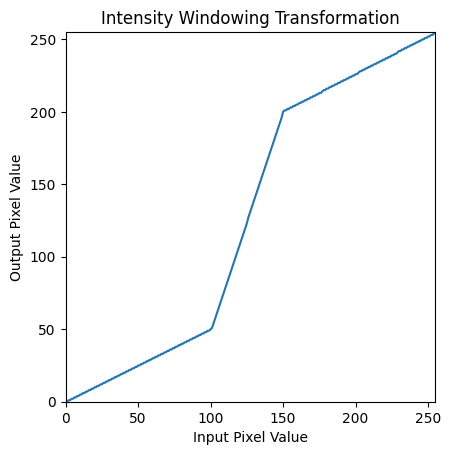

Saving cat.jpg to cat.jpg


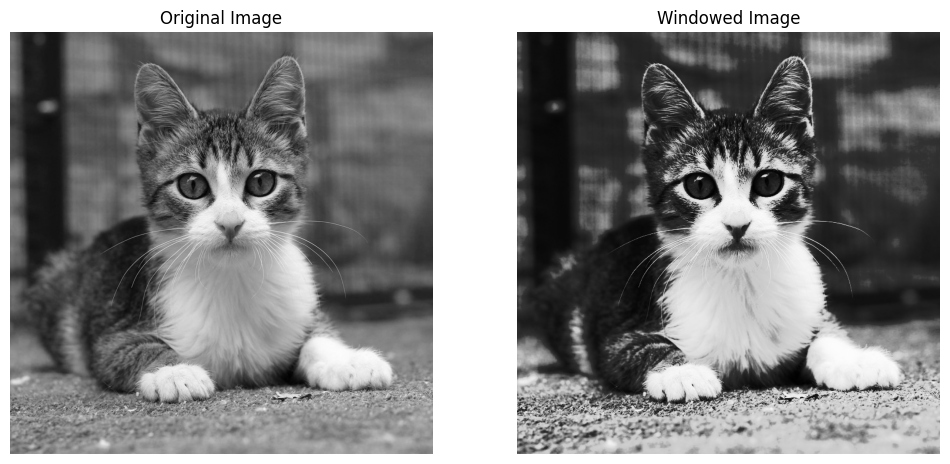

In [1]:
# Intensity Windowing in Colab
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define windowing parameters ---
# Two control points: (input_value, output_value)
c = np.array([(100, 50),   # Point 1
              (150, 200)]) # Point 2

# --- Step 2: Create transformation function ---
# Segment 1: from 0 to c[0,0]
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')

# Segment 2: from c[0,0] to c[1,0]
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')

# Segment 3: from c[1,0] to 255
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')

# Combine all into a single mapping table
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# --- Step 3: Plot the transformation curve ---
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input Pixel Value')
ax.set_ylabel('Output Pixel Value')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.set_title('Intensity Windowing Transformation')
plt.show()

# --- Step 4: Load a grayscale image ---
# Upload an image first if you don't have one
from google.colab import files
uploaded = files.upload()

# Replace with the uploaded filename
image_path = list(uploaded.keys())[0]
img_orig = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# --- Step 5: Apply windowing transformation ---
image_transformed = cv.LUT(img_orig, transform)

# --- Step 6: Display results ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Windowed Image')
ax[1].axis('off')

plt.show()


### Gamma correction
is a type of intensity transformation used to adjust the brightness of an image in a way that matches how humans perceive light.

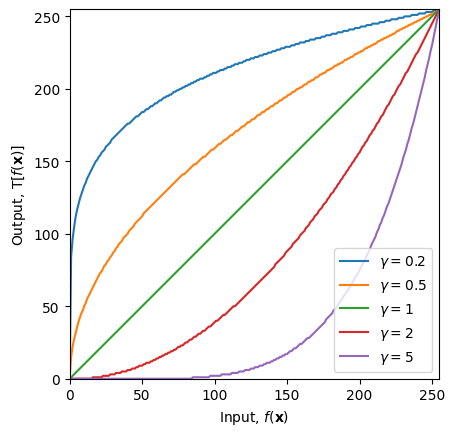

In [1]:
# Plots of Functions for Gamma Correction
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table = np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()


Saving cat.jpg to cat.jpg


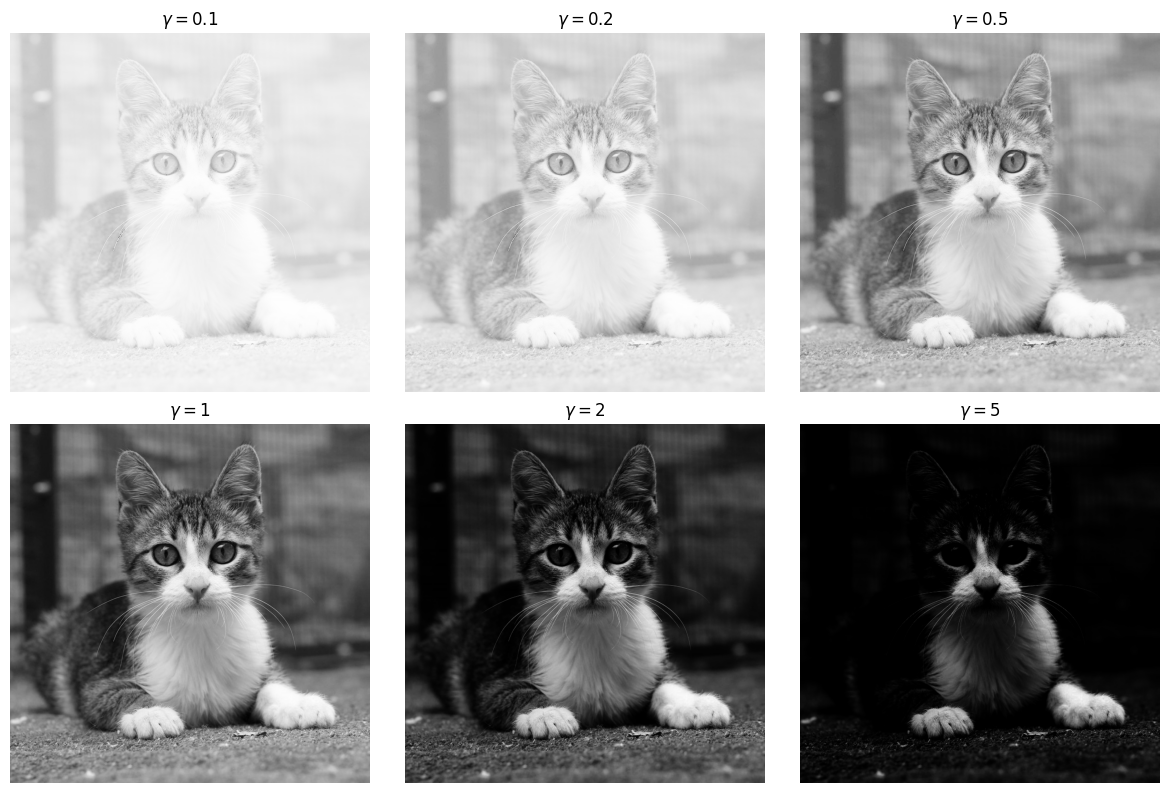

In [4]:
# Gamma Correction in Colab for multiple gamma values
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload an image
uploaded = files.upload()  # Upload your image
filename = list(uploaded.keys())[0]

# Step 2: Read image as grayscale
f = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Step 3: Gamma values to test
gammas = [0.1, 0.2, 0.5, 1, 2, 5]

# Step 4: Create figure
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Step 5: Apply gamma correction
for i, gamma in enumerate(gammas):
    # Create transformation table
    t = np.array([(j / 255.0) ** gamma * 255 for j in np.arange(256)]).astype(np.uint8)

    # Apply using LUT
    g = cv.LUT(f, t)

    # Show result
    ax[i // 3, i % 3].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[i // 3, i % 3].set_title(r'$\gamma = {gamma}$'.format(gamma=gamma))
    ax[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


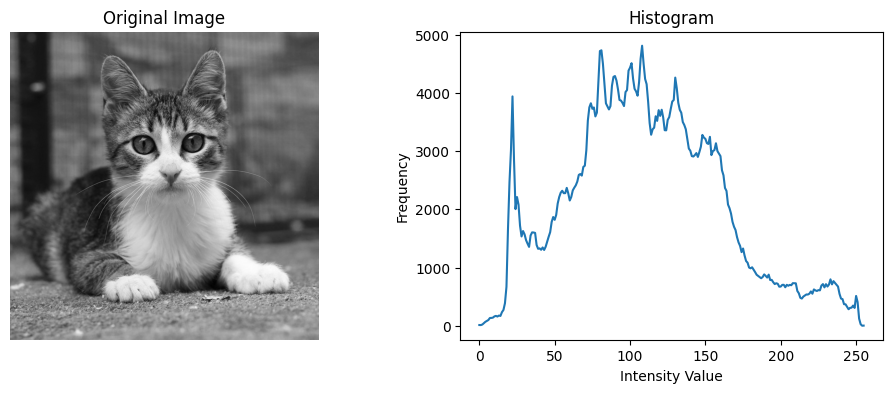

In [5]:
# Histrogram Using Numpy
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hist, bins = np.histogram(f.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()


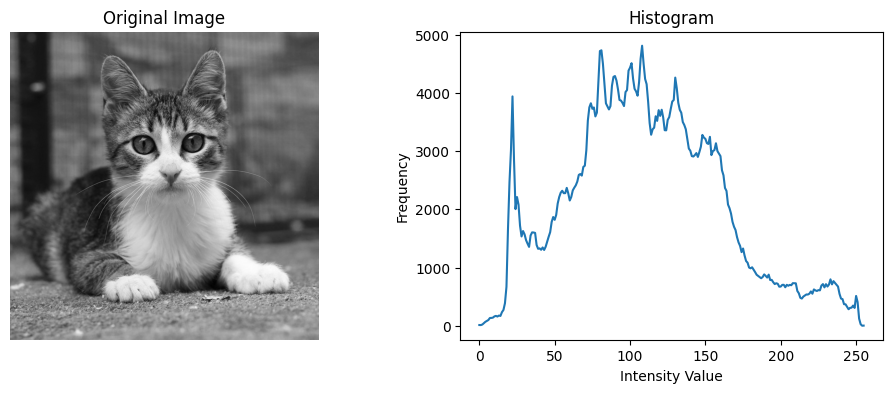

In [6]:
# Histogram Using OpenCV
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hist = cv.calcHist([f], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()


### Histogram Equalization
an image processing technique that adjusts the intensity distribution of an image so that the histogram becomes more spread out and uniform, improving contrast — especially in low-contrast images.

1️⃣ The idea
Some images have a narrow histogram — meaning pixel intensities are clustered in a small range (washed-out look).

Histogram equalization redistributes pixel intensities so they cover the full possible range (0–255 for 8-bit images).

This makes dark areas darker and bright areas brighter, revealing more details.

2️⃣ How it works (concept)
Calculate the histogram of the image.

Normalize it into a probability distribution (probability of each intensity).

Compute the cumulative distribution function (CDF) — tells how intensities accumulate from dark to bright.

Map old intensities to new intensities using the CDF, stretching them to cover the full range.



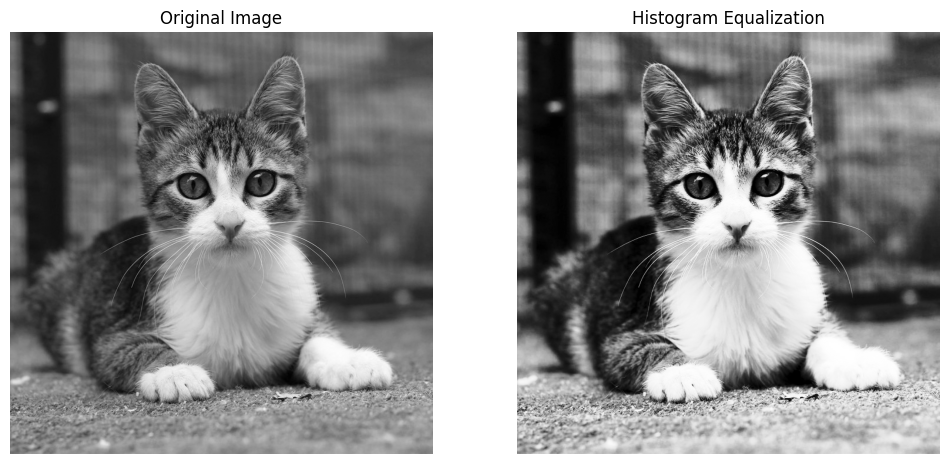

In [7]:
# Carry Our Histogram Equalization on the shells.tif Image

g = cv.equalizeHist(f)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

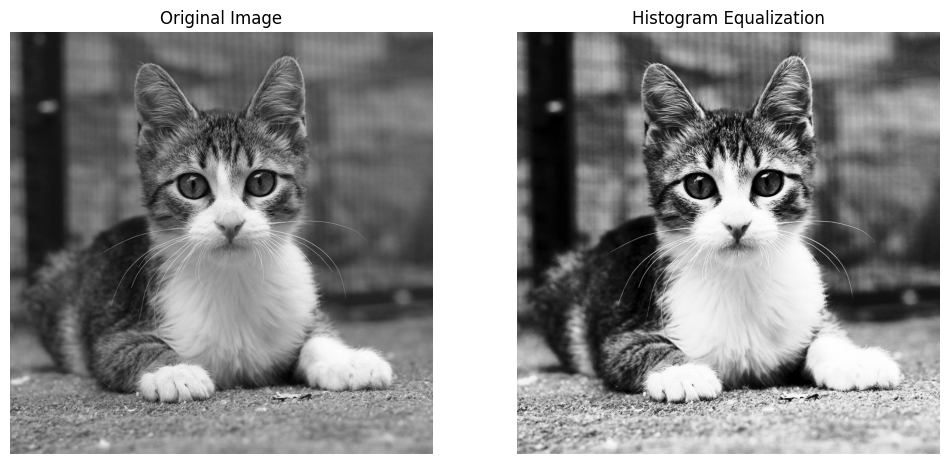

In [8]:
# Do the Same Using a Hand-Computed Intensity Transfromation
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
cdf_max = cdf.max()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[f]
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()